Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

# Multiple linear regression

In [27]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [28]:
# loan the data set ToyotaCorolla.csv
toyo = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [29]:
toyo.shape

(1436, 38)

In [30]:
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [31]:
# we need to have only ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight") as columns
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2                    

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [32]:
# rename the columns
toyo2 = toyo2.rename({'Age_08_04':'Age','Quarterly_Tax':'Q_Tax'},axis = 1)
toyo2.head()

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [33]:
toyo2.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [34]:
toyo2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Q_Tax     0
Weight    0
dtype: int64

In [35]:
toyo2.duplicated().sum()

1

In [36]:
# drop duplicates
toyo3 = toyo2.drop_duplicates().reset_index(drop = True)
toyo3.shape

(1435, 9)

In [37]:
# find the correlation between the numeric variables
corel = toyo3.corr()
corel

,Price,Age,KM,HP,cc,Doors,Gears,Q_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


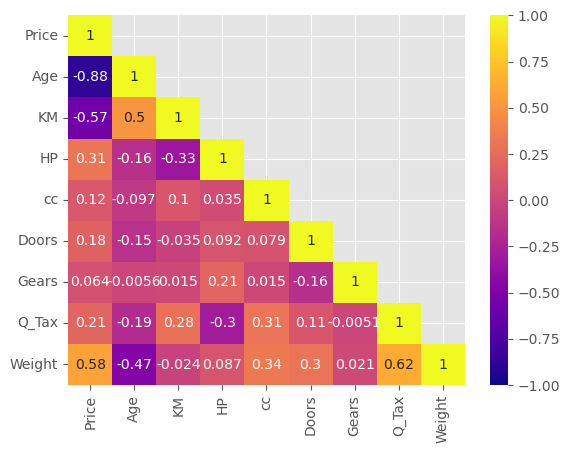

In [38]:
# heatmap visualisation
sns.heatmap(data = corel , vmin=-1,vmax = 1,annot = True,cmap = 'plasma',mask = np.triu(corel,1));

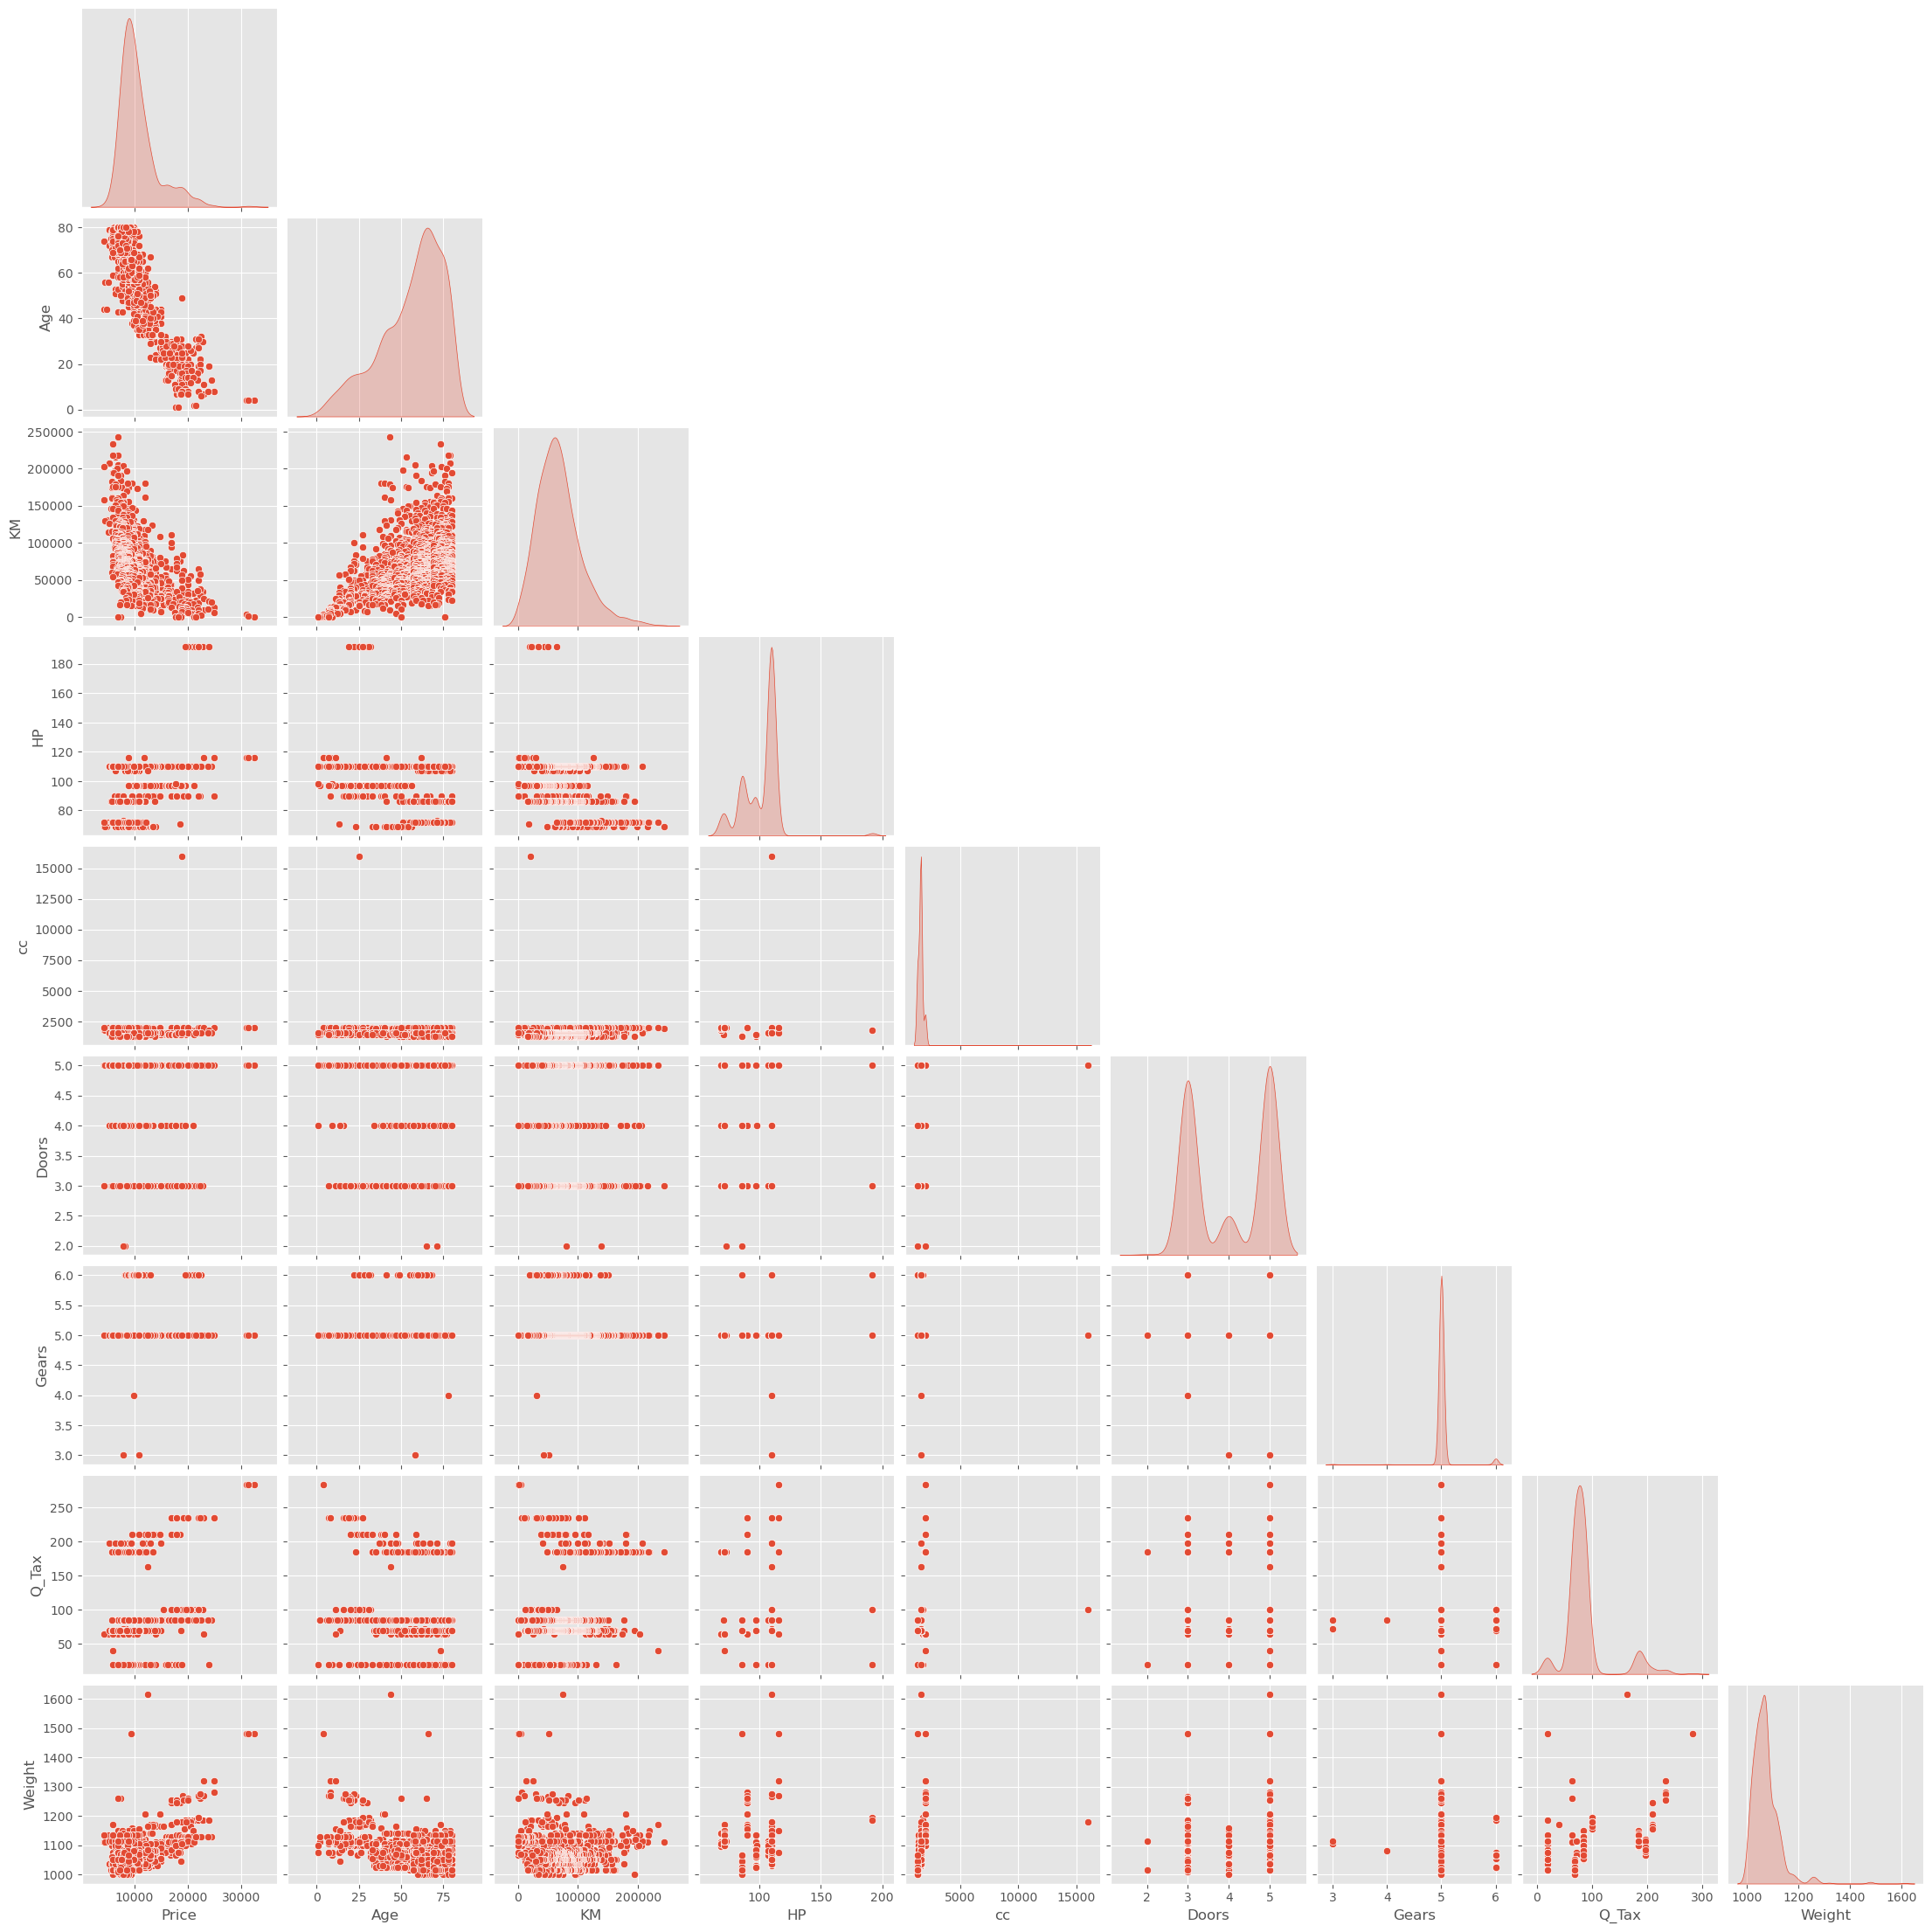

In [39]:
# pair plot using seaborn
sns.pairplot(data = toyo3,corner = True , diag_kind = 'kde');

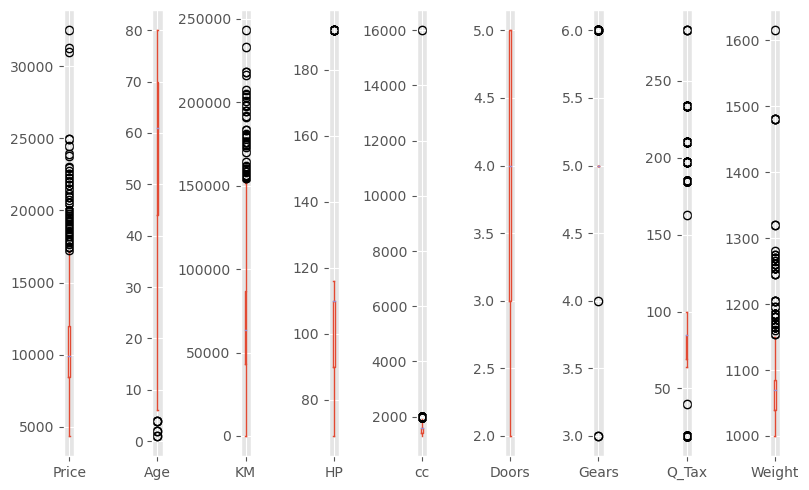

In [40]:
# checking for outlier detections
toyo3.plot(kind = 'box',subplots = True,figsize = (8,5))
plt.tight_layout();

In [41]:
## outliers treatment
def outlier_bounds(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    return lower_bound,upper_bound

In [42]:
ncolumns = ['Price','Age','KM','HP','cc','Doors','Gears','Q_Tax','Weight']

In [43]:
for col in ncolumns:
    lower_bound,upper_bound = outlier_bounds(toyo3[col])
    toyo3[col]=np.where(toyo3[col]>upper_bound,upper_bound,toyo3[col])
    toyo3[col]=np.where(toyo3[col]<lower_bound,lower_bound,toyo3[col])

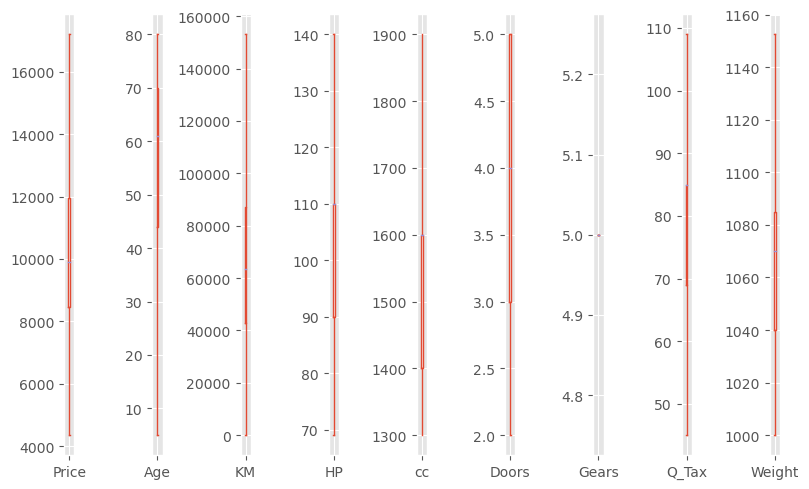

In [44]:
# plot again for checking outliers
toyo3.plot(kind = 'box',subplots = True, figsize = (8,5))
plt.tight_layout();

In [45]:
# from the above ,we can conclude that there are no outliers

## Multiple Linear Regression Model using statsmodels library

In [46]:
# import required libraries
from statsmodels.formula.api import ols

In [47]:
formula = 'Price~Age+KM+HP+cc+Doors+Gears+Q_Tax+Weight'
model = ols(formula,data = toyo3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1320.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:18:47   Log-Likelihood:                -12071.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1427   BIC:                         2.420e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -177.3407     53.022     -3.345      0.0

In [48]:
# calculate VIF for each independent variable
# importing variacnce influation factor from stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
Vif = pd.DataFrame()
Vif['VIFFactor']=[variance_inflation_factor(toyo3.values,i) for i in range(toyo3.shape[1])]
Vif['features']=toyo3.columns
Vif.round(1)

,VIFFactor,features
0,7.5,Price
1,5.4,Age
2,2.2,KM
3,1.4,HP
4,3.2,cc
5,1.3,Doors
6,2305.3,Gears
7,2.0,Q_Tax
8,4.6,Weight


In [50]:
# here gears is having VIF of more than 10 so we will remove gear from the data and build a new mpdel
toyo3.drop('Gears',axis = 1 ,inplace =True)

In [51]:
toyo3.head()

,Price,Age,KM,HP,cc,Doors,Q_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3.0,109.0,1152.5


In [53]:
formula = 'Price~Age+KM+HP+cc+Doors+Q_Tax+Weight'
model = ols(formula,data = toyo3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1320.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:20:17   Log-Likelihood:                -12071.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1427   BIC:                         2.420e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4610.8590   1378.565     -3.345      0.0

In [78]:
# here model accuracy is 86.6%

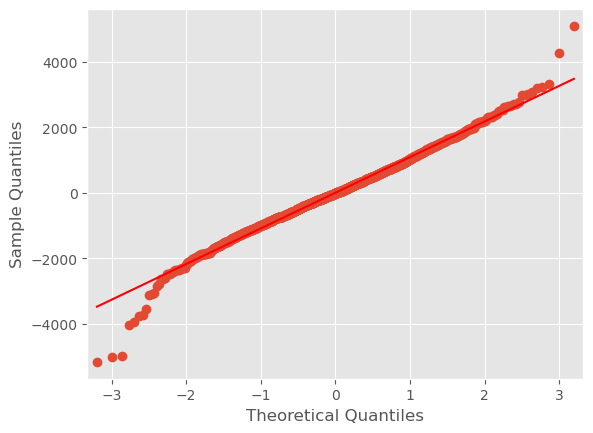

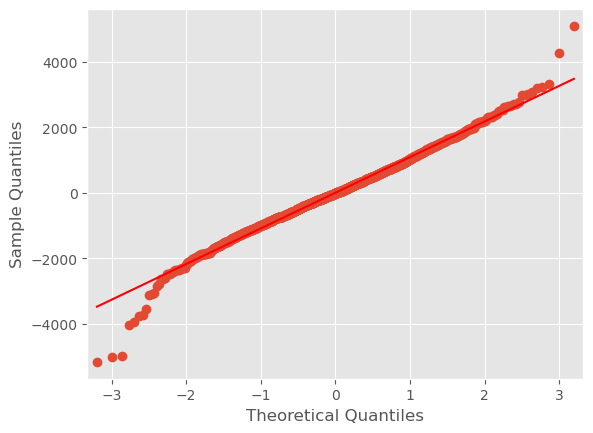

In [54]:
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid,line = 's')

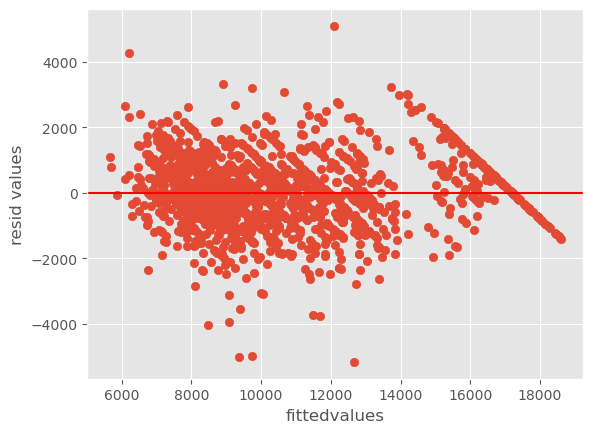

In [55]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('fittedvalues')
plt.ylabel('resid values')
plt.axhline(y=0,color='r',linestyle='-');

In [56]:
# Observation deletion diagnostics - detect influential observations
# get cook's distance
model_influence = model.get_influence() # influence object
(c,_)=model_influence.cooks_distance
c

array([3.42261894e-03, 1.36237501e-03, 1.98143225e-03, ...,
       7.35710782e-05, 2.13234727e-03, 2.53510076e-02])

In [57]:
#  greater than 4/no of observations
4/toyo3.shape[0] # 0.0

0.0027874564459930314

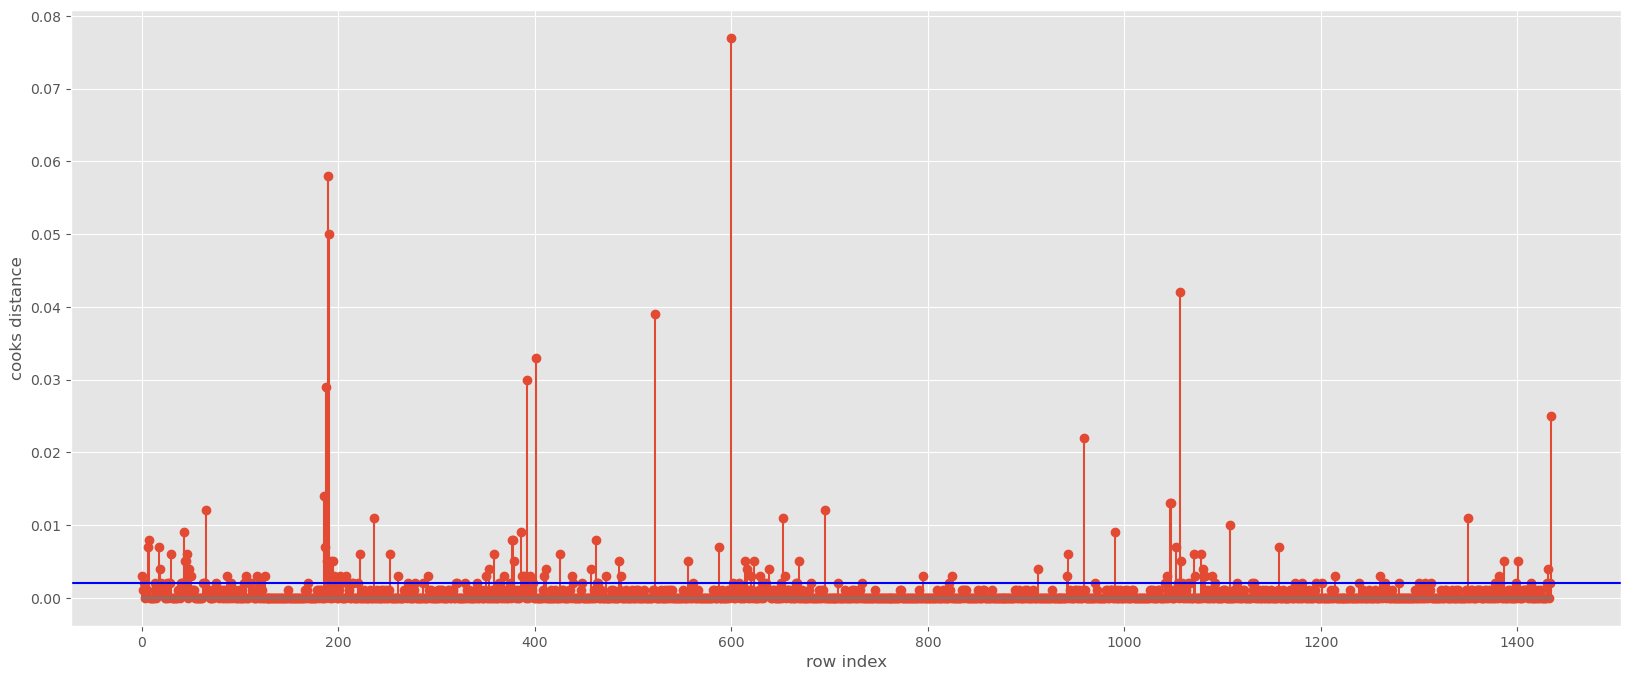

In [58]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(toyo3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.axhline(y=0.002,color='blue',linestyle='-');

In [59]:
# check which data points are influencers
cgreater = c>0.002
cgreater

array([ True, False, False, ..., False,  True,  True])

In [60]:
# get the index of elements of cgreater where cgreater is True
id_new = np.where(cgreater)
id_new

(array([   0,    6,    7,   18,   19,   30,   40,   41,   42,   43,   44,
          45,   46,   48,   49,   50,   62,   64,   65,   87,  104,  106,
         109,  111,  117,  120,  125,  185,  186,  188,  189,  190,  191,
         193,  195,  196,  202,  203,  208,  209,  210,  214,  215,  220,
         222,  236,  253,  261,  278,  286,  291,  320,  329,  341,  350,
         353,  358,  369,  377,  378,  379,  386,  387,  389,  390,  392,
         394,  395,  401,  409,  411,  426,  438,  457,  462,  472,  486,
         488,  522,  556,  587,  600,  608,  614,  616,  620,  623,  629,
         631,  633,  635,  638,  653,  655,  669,  695,  709,  795,  822,
         825,  912,  942,  943,  959,  990, 1043, 1046, 1047, 1053, 1055,
        1057, 1058, 1065, 1071, 1072, 1078, 1080, 1081, 1082, 1089, 1092,
        1108, 1130, 1132, 1157, 1214, 1260, 1265, 1279, 1300, 1350, 1377,
        1381, 1382, 1386, 1401, 1431, 1433, 1434], dtype=int64),)

In [61]:
id_new[0]

array([   0,    6,    7,   18,   19,   30,   40,   41,   42,   43,   44,
         45,   46,   48,   49,   50,   62,   64,   65,   87,  104,  106,
        109,  111,  117,  120,  125,  185,  186,  188,  189,  190,  191,
        193,  195,  196,  202,  203,  208,  209,  210,  214,  215,  220,
        222,  236,  253,  261,  278,  286,  291,  320,  329,  341,  350,
        353,  358,  369,  377,  378,  379,  386,  387,  389,  390,  392,
        394,  395,  401,  409,  411,  426,  438,  457,  462,  472,  486,
        488,  522,  556,  587,  600,  608,  614,  616,  620,  623,  629,
        631,  633,  635,  638,  653,  655,  669,  695,  709,  795,  822,
        825,  912,  942,  943,  959,  990, 1043, 1046, 1047, 1053, 1055,
       1057, 1058, 1065, 1071, 1072, 1078, 1080, 1081, 1082, 1089, 1092,
       1108, 1130, 1132, 1157, 1214, 1260, 1265, 1279, 1300, 1350, 1377,
       1381, 1382, 1386, 1401, 1431, 1433, 1434], dtype=int64)

In [71]:
toyo_new = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo_new = toyo_new.drop(id_new[0],axis=0).reset_index(drop =True)

In [72]:
toyo_new.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
1,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
2,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
3,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
4,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [73]:
toyo_new.shape

(1297, 38)

In [74]:
toyo_new.to_csv('toyo_new1.csv',index = False)

# Build a model on the above data set 'toyo_new1.csv' after removing the necesary column names